In [2]:
pip install plotly==5.22.0

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import chart_studio.plotly as py
# import plotly.graph_objs as go
# from plotly.offline import plot

# from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
# init_notebook_mode(connected=True)

### Readind the CSV file

In [2]:
amazon=pd.read_csv("AMZN.csv")

### Data inspection and Cleaning


In [3]:
amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [4]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6516 non-null   object 
 1   Open       6516 non-null   float64
 2   High       6516 non-null   float64
 3   Low        6516 non-null   float64
 4   Close      6516 non-null   float64
 5   Adj Close  6516 non-null   float64
 6   Volume     6516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 356.5+ KB


In [5]:
amazon['Date']=pd.to_datetime(amazon['Date'])

In [6]:
print(f'Datafrane contains stock prices between {amazon.Date.min()} {amazon.Date.max()}')
print(f'Total days={(amazon.Date.max()-amazon.Date.min()).days}days')

Datafrane contains stock prices between 1997-05-15 00:00:00 2023-04-05 00:00:00
Total days=9456days


In [7]:
#Handle outliers using IQR method
for column in amazon.columns:
    Q1=amazon[column].quantile(0.25)
    Q3=amazon[column].quantile(0.75)
    IQR=Q3-Q1
    amazon=amazon[~((amazon[column]<(Q1-1.5*IQR))|(amazon[column]>(Q3+1.5*IQR)) )]
amazon

,Date,Open,High,Low,Close,Adj Close,Volume
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
5,1997-05-22,0.071875,0.072396,0.065625,0.069792,0.069792,235536000
6,1997-05-23,0.070313,0.076042,0.066667,0.075000,0.075000,318744000
...,...,...,...,...,...,...,...
4054,2013-06-26,13.699000,13.899000,13.675000,13.878500,13.878500,60590000
4055,2013-06-27,13.959000,14.010000,13.727000,13.877500,13.877500,50390000
4056,2013-06-28,13.809500,13.991500,13.809500,13.884500,13.884500,63866000
4097,2013-08-27,14.193500,14.264000,13.987000,14.046500,14.046500,49520000


### Descriptive Statistics

In [8]:
amazon.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3705,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3.705000e+03
mean,2005-10-23 10:09:25.506072832,3.962165,4.025995,3.895350,3.962149,3.962149,1.406068e+08
min,1997-05-16 00:00:00,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06
25%,2002-01-17 00:00:00,1.580500,1.615000,1.537000,1.582500,1.582500,9.442600e+07
50%,2005-11-16 00:00:00,2.456250,2.505000,2.408500,2.452500,2.452500,1.296020e+08
75%,2009-10-02 00:00:00,4.795500,4.862500,4.712500,4.766000,4.766000,1.770020e+08
max,2013-08-30 00:00:00,14.229500,14.264000,14.000000,14.053500,14.053500,3.446000e+08
std,NaN,3.656187,3.695163,3.614186,3.656867,3.656867,6.555982e+07


### Data Visualization

<Axes: >

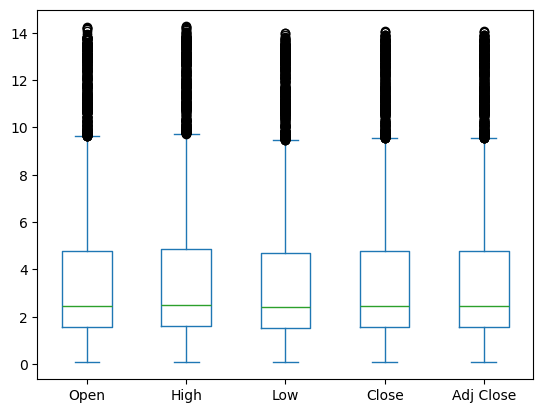

In [9]:
amazon[['Open','High','Low','Close','Adj Close']].plot(kind='box')

Text(0, 0.5, 'Closing Price')

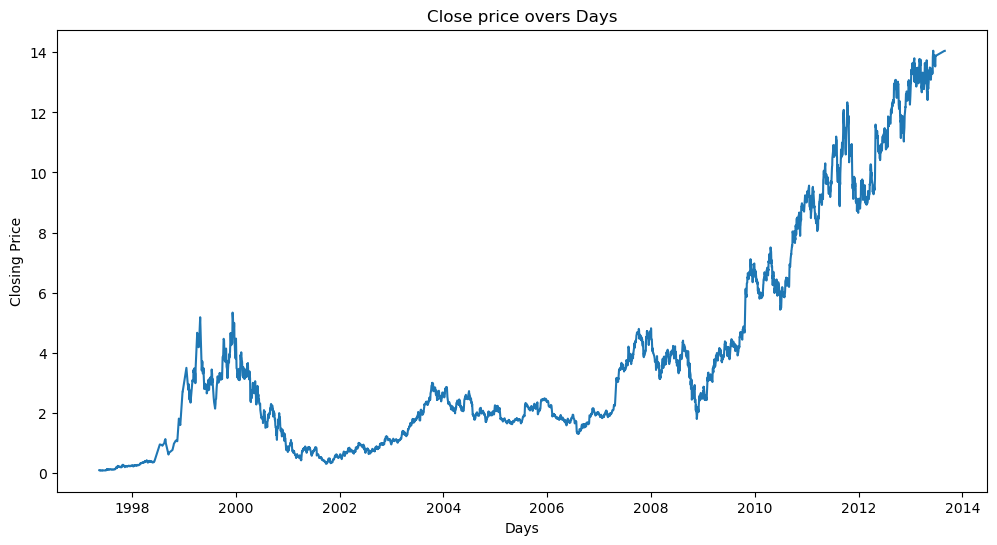

In [10]:
plt.figure(figsize=(12,6))
plt.plot(amazon['Date'],amazon['Close'])
plt.title("Close price overs Days")
plt.xlabel("Days")
plt.ylabel("Closing Price")

### Building Regression Model

In [11]:
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [12]:
#splitting the feature and target
x=np.array(amazon.index).reshape(-1,1)
y=amazon['Close']


In [13]:
#splitting  the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
#Feature Scaling
scaler=StandardScaler().fit(X_train)


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
#creating a linear model
linearreg=LinearRegression()
linearreg.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred=linearreg.predict(X_test)

In [18]:
y_pred

array([ 8.70615800e+00,  1.84227223e+00,  4.50426162e+00,  1.05129611e+00,
        1.08020222e+00,  3.62919502e+00,  7.80481313e+00, -7.34141136e-02,
        7.23720236e+00,  8.16745334e+00,  4.02074134e+00, -2.41595082e-01,
       -9.43225060e-01,  3.37429574e+00,  5.60794923e+00,  4.05227527e+00,
       -1.16659041e+00,  2.53076307e+00,  6.24651134e+00,  7.26348063e+00,
        2.86712501e+00,  7.64451564e+00,  6.99281439e+00,  2.14184458e+00,
        1.66357995e+00,  6.24913917e+00,  2.45981172e+00,  1.40868067e+00,
        3.18771998e+00,  5.17435767e+00,  6.54082803e+00,  2.12870544e+00,
       -1.39258358e+00, -1.35053834e+00,  7.64977130e+00,  5.70780668e+00,
        1.53218857e+00,  8.93740683e+00, -1.55288107e+00,  3.66861243e+00,
        4.30980238e+00, -2.31083772e-01,  6.79309949e+00,  6.07570254e+00,
        8.55899966e+00,  3.83827894e-01,  5.34779429e+00,  8.33826213e+00,
       -1.60018197e+00,  5.82343109e+00,  6.92186304e+00,  3.22713739e+00,
        7.36333808e+00,  

In [19]:
y_test.values

array([13.3175  ,  0.7585  ,  1.5415  ,  0.785   ,  0.6405  ,  1.726   ,
        9.9635  ,  3.29375 ,  7.9335  ,  9.2215  ,  2.4415  ,  2.767188,
        0.36875 ,  2.0025  ,  3.796   ,  2.461   ,  0.257552,  2.334   ,
        3.96    ,  8.2305  ,  2.122   ,  9.62    ,  5.942   ,  1.1045  ,
        0.958   ,  4.0305  ,  2.082   ,  0.53    ,  1.9255  ,  4.226   ,
        4.668   ,  1.091   ,  0.216927,  0.226042,  9.416   ,  3.733   ,
        0.781   , 13.206   ,  0.095573,  1.775   ,  1.5805  ,  3.101563,
        5.904   ,  2.5795  , 12.197   ,  2.528125,  4.5375  , 11.133   ,
        0.084375,  4.0405  ,  7.0865  ,  1.9715  ,  9.0545  ,  4.99375 ,
        0.816   ,  8.864   ,  8.6645  ,  4.0315  ,  3.2045  ,  0.5125  ,
        1.807   ,  0.726   ,  1.7625  ,  2.293   ,  0.8555  ,  3.8625  ,
        1.2055  ,  6.005   ,  2.019   ,  1.3045  ,  0.080208, 12.957   ,
       11.607   ,  1.779   ,  4.632   , 12.4155  , 11.6375  , 13.0115  ,
       13.0635  ,  1.4715  , 10.975   ,  3.479   , 

In [20]:
linearreg.coef_

array([0.00262783])

In [21]:
linearreg.intercept_

-1.6422272095861268

In [22]:
#mean square error
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
mse
r2

0.4985160977976304

Text(0, 0.5, 'Closing Price')

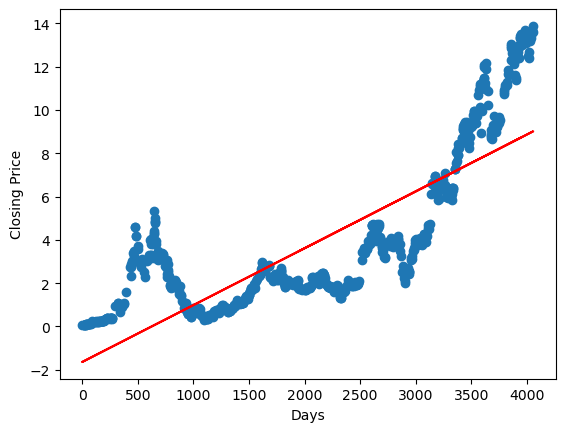

In [26]:
plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='red')
plt.xlabel("Days")
plt.ylabel("Closing Price")